In [1]:
from Zbeam import *
import h5py as h5
import matplotlib.pyplot as plt

# Load FA data

In [2]:
with h5.File("../data/FAST_19FA.h5",'r') as f:
    print(f.keys())
    print(f.attrs.keys())
    print(f["B01"].keys())
    Model = f["B01/Model"][:]
    Coef  = f["B01/Coefficient"][:]
    H_coor = f.attrs["H_coor"][:]
    V_coor = f.attrs["V_coor"][:]
    FitRadius = f.attrs["FittingRadius"]
    Z_order = f.attrs["Z_order"]
    Polar = f.attrs["Polarization"]
    print(Polar)

<KeysViewHDF5 ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19']>
<KeysViewHDF5 ['FittingRadius', 'H_coor', 'Polarization', 'V_coor', 'Z_order']>
<KeysViewHDF5 ['Coefficient', 'Model']>
Stokes I


# Plot Beam_figure

## De-noise Beam model

Text(0.5, 0, '$\\delta H \\ [arcmin]$')

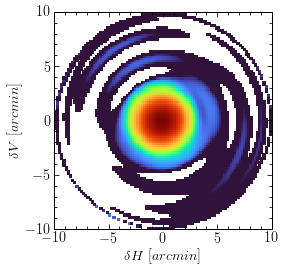

In [18]:
plt.pcolormesh(H_coor, V_coor, np.ma.log10(Model), vmax=0, vmin=-2.5, cmap= 'turbo')
plt.gca().set_aspect('equal')
plt.ylabel(f"$\delta V \ [arcmin]$")
plt.xlabel(f"$\delta H \ [arcmin]$")

## Eval new coef BeaM Model 

In [11]:
cart = Beam_cart(Z_order=Z_order, size = FitRadius)
H_t = np.linspace(-20,20,201)
V_t = np.linspace(-10,10,101)
cart.make_grid(H_t,V_t)
Phi = cart.eval_grid(Coef)

Text(0.5, 0, '$\\delta H \\ [arcmin]$')

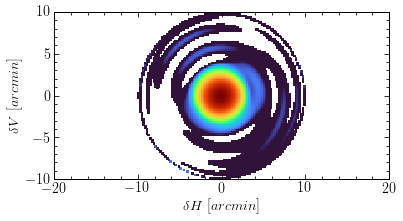

In [12]:
plt.pcolormesh(H_t, V_t, np.ma.log10(Phi), vmax=0, vmin=-2.5, cmap= 'turbo')
plt.gca().set_aspect('equal')
plt.ylabel(f"$\delta V \ [arcmin]$")
plt.xlabel(f"$\delta H \ [arcmin]$")

# Sky Project

In [19]:
# sources status
s_ra   = np.array([129.9, 130.2])
s_dec  = np.array([26.3, 26.3])
s_flux = np.array([10,20])  # mJy
# scan path 
scan_dec = np.array([26.27])
scan_ra = 130.001 + np.linspace(-0.3,0.3,100)

In [20]:
cart = Beam_cart(Z_order=Z_order, size = fig_size)

In [21]:
vis = cart.mapping((s_ra,s_dec,s_flux), (scan_ra,scan_dec), c_, rot = 23.4)

Text(0, 0.5, 'Flux [mJy]')

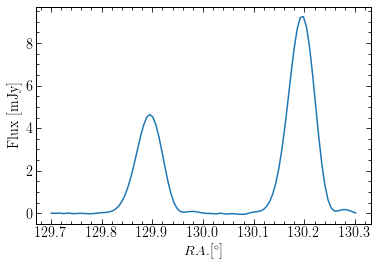

In [22]:
plt.plot(scan_ra, vis)
plt.xlabel(f"$RA. [^\circ]$")
plt.ylabel("Flux [mJy]")